# Example wind resource forecast

Here's a quick example of a wind resource forecast using NOAA GFS, NOAA GEFS, and ECMWF AIFS.

First, import some things:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from hefty.wind import get_wind_forecast

Define the location and forecast time information. We will use the Vineyard Wind project as Hurricane Erin approached, inspired by this post by Grid Status: https://www.linkedin.com/posts/grid-status_hurricane-erin-the-1st-major-storm-of-the-activity-7366092037596561409-HWyS/.

In [2]:
latitude, longitude = 41.03325, -70.61667 # vineyard wind
init_date = '2025-08-20 12:00' # datetime the forecast model was initialized
run_length = 36
lead_time_to_start = 12

## NOAA GFS
Now, get the GFS forecast:

In [3]:
resource_data_gfs = get_wind_forecast(
    latitude,
    longitude,
    init_date,
    run_length=run_length, 
    lead_time_to_start=lead_time_to_start, 
    model='gfs',
)

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F13 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F14 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F15 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 12:00 UTC F16 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [5] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2025-Aug-20 

Preview the output:

In [4]:
resource_data_gfs.head()

,point,wind_speed_10m,wind_speed_80m,wind_speed_100m,wind_direction_10m,wind_direction_80m,wind_direction_100m,temp_air_2m,temp_air_80m,pressure_0m,pressure_80m
valid_time,,,,,,,,,,,
2025-08-21 00:30:00,0,11.140470,12.799704,12.882806,90.466507,90.871513,90.899513,18.677315,17.588820,101876.140625,100930.570312
2025-08-21 01:30:00,0,11.049027,12.681253,12.767630,90.182022,90.634171,90.664017,18.600904,17.539602,101887.039062,100940.695312
2025-08-21 02:30:00,0,11.002935,12.622985,12.703694,86.678719,87.271492,87.333443,18.443037,17.371984,101863.601562,100916.515625
2025-08-21 03:30:00,0,11.332997,13.067352,13.154832,85.720413,86.170784,86.249306,18.386858,17.236965,101827.625000,100881.148438
2025-08-21 04:30:00,0,11.553192,13.415955,13.518823,85.704918,86.074982,86.156898,18.381371,17.221127,101775.539062,100829.796875


And a quick plot:

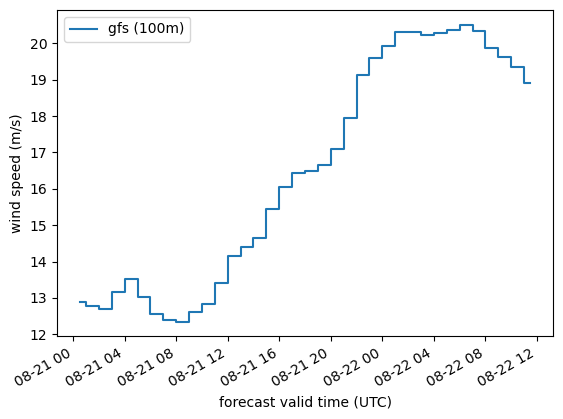

In [5]:
resource_data_gfs['wind_speed_100m'].plot(drawstyle='steps-mid', label='gfs (100m)')
plt.ylabel('wind speed (m/s)')
plt.xlabel('forecast valid time (UTC)')
plt.legend()
plt.show()

## NOAA GEFS
And then get the control member of the NOAA GEFS ensemble. For wind, we have to use the "*pgrb2bp5 (Secondary Parms)*" product (`atmos.5b` in Herbie), which does not include a "mean" output for some reason. See https://www.nco.ncep.noaa.gov/pmb/products/gens/. 

In [6]:
resource_data_gefs_c = get_wind_forecast(
    latitude,
    longitude,
    init_date,
    run_length=run_length, 
    lead_time_to_start=lead_time_to_start, 
    model='gefs',
    member='c00',
)

✅ Found ┊ model=gefs ┊ product=atmos.5b ┊ 2025-Aug-20 12:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gefs ┊ product=atmos.5b ┊ 2025-Aug-20 12:00 UTC F15 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gefs ┊ product=atmos.5b ┊ 2025-Aug-20 12:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gefs ┊ product=atmos.5b ┊ 2025-Aug-20 12:00 UTC F21 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gefs ┊ product=atmos.5b ┊ 2025-Aug-20 12:00 UTC F24 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=gefs ┊ product=atmos.5b ┊ 2025-Aug-20 12:00 

In [7]:
resource_data_gefs_c.head()

,point,wind_speed_80m,wind_speed_100m,wind_direction_80m,wind_direction_100m,temp_air_80m,pressure_80m
valid_time,,,,,,,
2025-08-21 00:30:00,0,12.484832,12.609240,88.994560,89.208611,17.993847,100903.773438
2025-08-21 01:30:00,0,12.457055,12.580094,85.735924,85.943260,17.856762,100913.953125
2025-08-21 02:30:00,0,12.429277,12.550949,82.477280,82.677925,17.719677,100924.125000
2025-08-21 03:30:00,0,12.559773,12.684962,81.161621,81.343422,17.617054,100903.421875
2025-08-21 04:30:00,0,12.853909,12.987664,81.854805,82.005241,17.550056,100850.804688


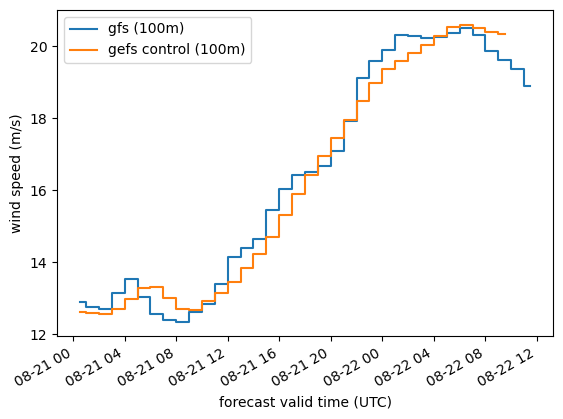

In [8]:
resource_data_gfs['wind_speed_100m'].plot(drawstyle='steps-mid', label='gfs (100m)')
resource_data_gefs_c['wind_speed_100m'].plot(drawstyle='steps-mid', label='gefs control (100m)')
plt.ylabel('wind speed (m/s)')
plt.xlabel('forecast valid time (UTC)')
plt.legend()
plt.show()

## ECMWF AIFS
And then get the ECMWF AIFS forecast:

In [9]:
resource_data_aifs = get_wind_forecast(
    latitude,
    longitude,
    init_date,
    run_length=run_length, 
    lead_time_to_start=lead_time_to_start, 
    model='aifs',
)

✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F24 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F30 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F36 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [4] xarray.Datasets because cfgrib opened with multiple hypercubes.
✅ Found ┊ model=aifs ┊ product=oper ┊ 2025-Aug-20 12:00 UTC F42 ┊ GRIB2 @ aws ┊ 

Preview the output:

In [10]:
resource_data_aifs.head()

,point,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,temp_air_2m,pressure_0m
valid_time,,,,,,,
2025-08-21 00:30:00,0,11.196704,13.373463,74.488678,75.916504,18.436293,101805.148438
2025-08-21 01:30:00,0,11.322634,13.471054,74.257965,75.598068,18.346632,101788.609375
2025-08-21 02:30:00,0,11.448565,13.568645,74.027252,75.279648,18.256971,101772.054688
2025-08-21 03:30:00,0,11.574494,13.666234,73.796539,74.961220,18.167311,101755.515625
2025-08-21 04:30:00,0,11.700425,13.763825,73.565826,74.642799,18.077650,101738.976562


And plot all three forecasts:

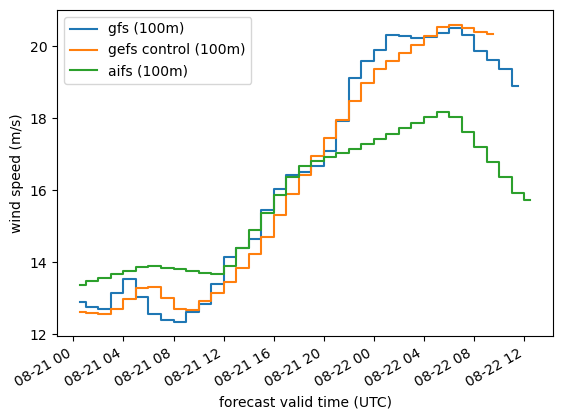

In [11]:
resource_data_gfs['wind_speed_100m'].plot(drawstyle='steps-mid', label='gfs (100m)')
resource_data_gefs_c['wind_speed_100m'].plot(drawstyle='steps-mid', label='gefs control (100m)')
resource_data_aifs['wind_speed_100m'].plot(drawstyle='steps-mid', label='aifs (100m)')
plt.ylabel('wind speed (m/s)')
plt.xlabel('forecast valid time (UTC)')
plt.legend()
plt.show()

Note that the AIFS forecast is 6-hour interval, but `get_wind_forecast` interpolates it to hourly. 

## Convert the dataframe format

We can convert the dataframe format returned by `get_wind_forecast` to something closer to what is used for wind resource data in `windpowerlib` [1], a python-based wind power modeling library. An example of that format is in [2].

[1] https://github.com/wind-python/windpowerlib/
[2] https://windpowerlib.readthedocs.io/en/stable/modelchain_example_notebook.html#Import-weather-data

In [12]:
# select a single point - we only had one in the example above
i = 0 

# make a new dataframe, copying relevant columns
weather = resource_data_gfs[resource_data_gfs['point']==i][
    [
        'wind_speed_10m',
        'wind_speed_80m',
        'wind_speed_100m',
        'temp_air_2m',
        'temp_air_80m',
        'pressure_0m',
        'pressure_80m'
    ]
    ].copy()

# turn into a multiindex
weather.columns = pd.MultiIndex.from_tuples((
    ('wind_speed', 10),
    ('wind_speed', 80),
    ('wind_speed', 100),
    ('temperature', 2),
    ('temperature', 80),
    ('pressure', 0),
    ('pressure', 80)
    ),
    names = ['variable_name', 'height'])

# preview
weather.head()

variable_name       wind_speed                       temperature             \
height                     10         80         100         2          80    
valid_time                                                                    
2025-08-21 00:30:00  11.140470  12.799704  12.882806   18.677315  17.588820   
2025-08-21 01:30:00  11.049027  12.681253  12.767630   18.600904  17.539602   
2025-08-21 02:30:00  11.002935  12.622985  12.703694   18.443037  17.371984   
2025-08-21 03:30:00  11.332997  13.067352  13.154832   18.386858  17.236965   
2025-08-21 04:30:00  11.553192  13.415955  13.518823   18.381371  17.221127   

variable_name             pressure                 
height                         0              80   
valid_time                                         
2025-08-21 00:30:00  101876.140625  100930.570312  
2025-08-21 01:30:00  101887.039062  100940.695312  
2025-08-21 02:30:00  101863.601562  100916.515625  
2025-08-21 03:30:00  101827.625000  100881.148438  
2025-08-21 04:30:00  101775.539062  100829.796875

_This document/data/output/Results is/are based on data and products of the European Centre for Medium-Range Weather Forecasts (ECMWF), licensed under CC BY 4.0. © 2025 European Centre for Medium-Range Weather Forecasts (ECMWF), www.ecmwf.int. This data is published under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0). To view a copy of this licence, visit https://creativecommons.org/licenses/by-nc-sa/4.0/. ECMWF does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use._

_ECMWF Data have been modified using the functions included in the hefty Python package (e.g., interpolation to hourly values)._